<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




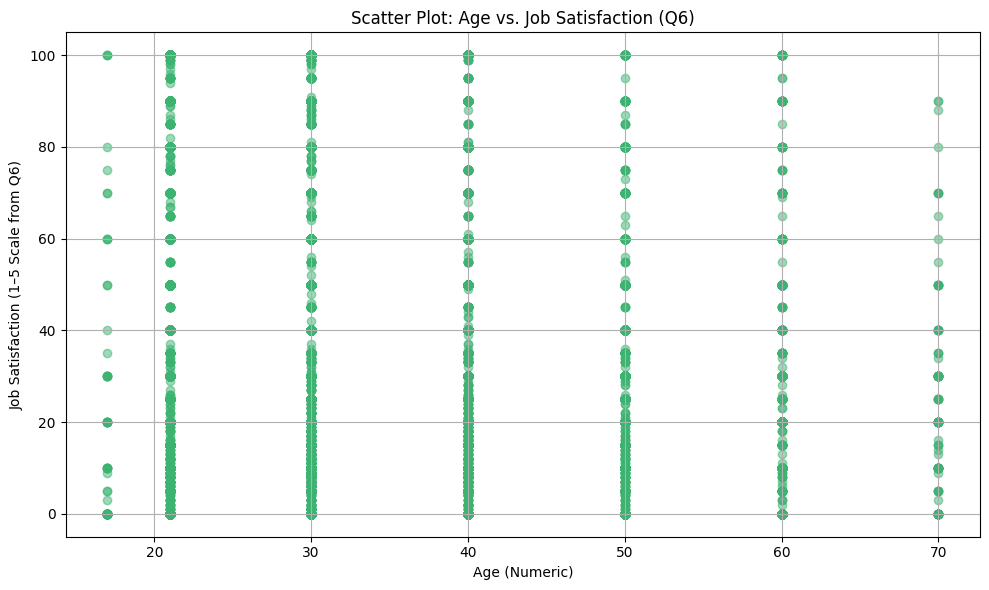

In [3]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=["Age", "JobSatPoints_6"])

# Convert Age into approximate numeric midpoints
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df["AgeNum"] = df["Age"].map(age_mapping)

# Drop any rows where Age wasn't mapped
df = df.dropna(subset=["AgeNum"])

# Convert JobSatPoints_6 to numeric (if not already)
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors='coerce')
df = df.dropna(subset=["JobSatPoints_6"])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["AgeNum"], df["JobSatPoints_6"], alpha=0.5, color="mediumseagreen")

# Add labels and title
plt.title("Scatter Plot: Age vs. Job Satisfaction (Q6)")
plt.xlabel("Age (Numeric)")
plt.ylabel("Job Satisfaction (1–5 Scale from Q6)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


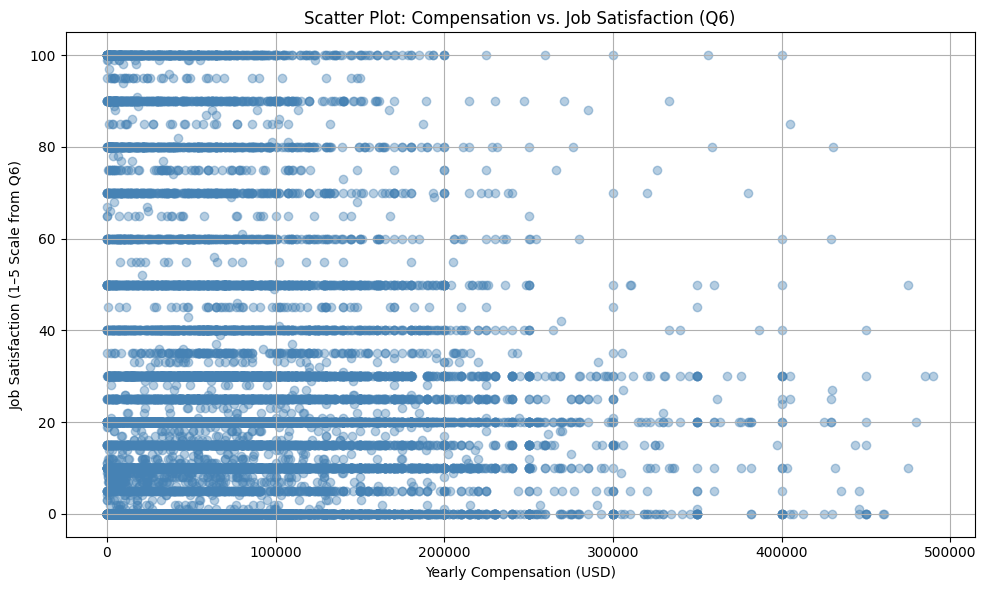

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values in relevant columns
df = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

# Convert columns to numeric (if needed)
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors='coerce')
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors='coerce')

# Drop rows with NaN after conversion
df = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

# Optional: Filter out extreme outliers in compensation for better visualization
df = df[df["ConvertedCompYearly"] < 500000]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["ConvertedCompYearly"], df["JobSatPoints_6"], alpha=0.4, color="steelblue")

# Add labels and title
plt.title("Scatter Plot: Compensation vs. Job Satisfaction (Q6)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (1–5 Scale from Q6)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


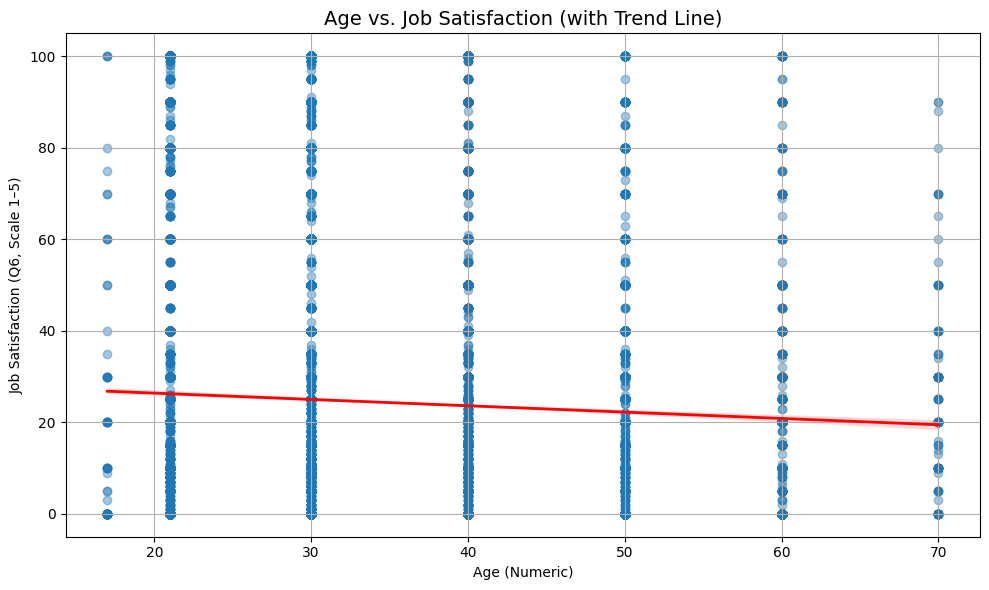

In [6]:
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Now it will work

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Drop missing values in the relevant columns
df = df.dropna(subset=["Age", "JobSatPoints_6"])

# Convert Age to approximate numeric values
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df["AgeNum"] = df["Age"].map(age_mapping)
df = df.dropna(subset=["AgeNum"])

# Ensure JobSatPoints_6 is numeric
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors='coerce')
df = df.dropna(subset=["JobSatPoints_6"])

# Plot scatter with regression trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="AgeNum", y="JobSatPoints_6", scatter_kws={"alpha": 0.4}, line_kws={"color": "red", "linewidth": 2})

# Add labels and title
plt.title("Age vs. Job Satisfaction (with Trend Line)", fontsize=14)
plt.xlabel("Age (Numeric)")
plt.ylabel("Job Satisfaction (Q6, Scale 1–5)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


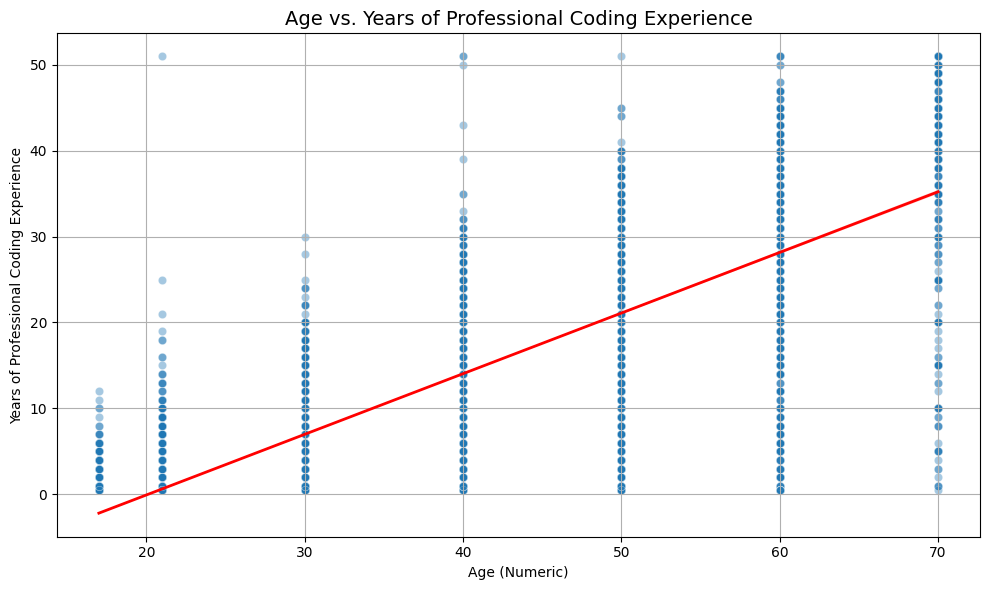

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values in Age and YearsCodePro
df = df.dropna(subset=["Age", "YearsCodePro"])

# Convert Age to approximate numeric values
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df["AgeNum"] = df["Age"].map(age_mapping)

# Convert YearsCodePro to numeric (some values might be "Less than 1 year" or "More than 50 years")
df["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year": "0.5",
    "More than 50 years": "51"
})
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

# Drop rows with any remaining NaN values in the numeric columns
df = df.dropna(subset=["AgeNum", "YearsCodePro"])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="AgeNum", y="YearsCodePro", alpha=0.4)

# Add regression line
sns.regplot(data=df, x="AgeNum", y="YearsCodePro", scatter=False, color="red", line_kws={"linewidth": 2})

# Customize plot
plt.title("Age vs. Years of Professional Coding Experience", fontsize=14)
plt.xlabel("Age (Numeric)")
plt.ylabel("Years of Professional Coding Experience")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


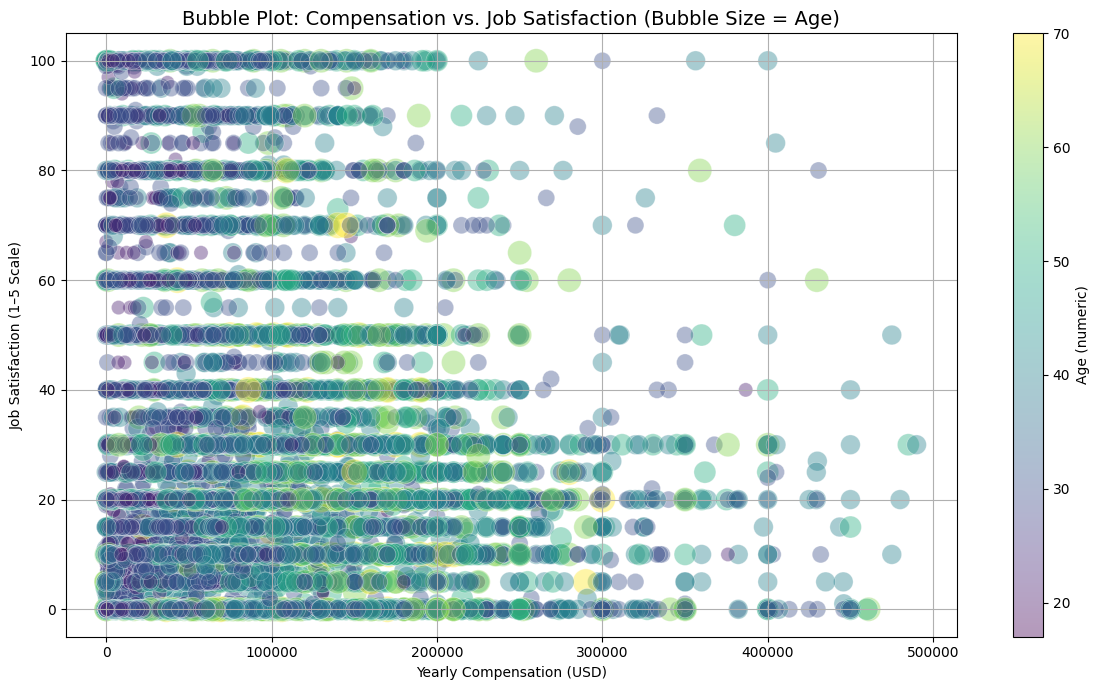

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Drop missing values in required columns
df = df.dropna(subset=["Age", "ConvertedCompYearly", "JobSatPoints_6"])

# Convert Age to numeric values
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df["AgeNum"] = df["Age"].map(age_mapping)

# Drop any remaining NaNs in numeric columns
df = df.dropna(subset=["AgeNum"])

# Convert Job Satisfaction to numeric if it's not already
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors='coerce')
df = df.dropna(subset=["JobSatPoints_6"])

# Optional: Limit compensation to a reasonable upper bound to reduce skew
df = df[df["ConvertedCompYearly"] < 500000]

# Plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    x=df["ConvertedCompYearly"],
    y=df["JobSatPoints_6"],
    s=df["AgeNum"] * 5,  # Scale bubble size
    alpha=0.4,
    c=df["AgeNum"],
    cmap="viridis",
    edgecolors="w",
    linewidths=0.5
)

plt.colorbar(label="Age (numeric)")
plt.title("Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)", fontsize=14)
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (1–5 Scale)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing data in relevant columns
df = df.dropna(subset=["LanguageHaveWorkedWith", "JobSatPoints_6"])

# Convert Job Satisfaction to numeric
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df = df.dropna(subset=["JobSatPoints_6"])

# Explode the semicolon-separated languages into multiple rows
df_exploded = df.copy()
df_exploded["LanguageHaveWorkedWith"] = df_exploded["LanguageHaveWorkedWith"].str.split(";")
df_exploded = df_exploded.explode("LanguageHaveWorkedWith")

# Group by each language and calculate the average job satisfaction
language_job_sat = df_exploded.groupby("LanguageHaveWorkedWith")["JobSatPoints_6"].mean().reset_index()

# Count how many respondents worked with each language
language_counts = df_exploded["LanguageHaveWorkedWith"].value_counts().reset_index()
language_counts.columns = ["LanguageHaveWorkedWith", "Count"]

# Merge counts with average satisfaction
merged = pd.merge(language_job_sat, language_counts, on="LanguageHaveWorkedWith")

# Filter for popular languages (at least 100 respondents)
merged_filtered = merged[merged["Count"] >= 100]

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=merged_filtered,
    x="Count",
    y="JobSatPoints_6",
    hue="LanguageHaveWorkedWith",
    s=100,
    palette="tab10",
    legend=False
)

plt.title("Programming Languages vs. Job Satisfaction", fontsize=16)
plt.xlabel("Number of Respondents Who Worked with the Language")
plt.ylabel("Average Job Satisfaction (JobSatPoints_6)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [ ]:
## Write your code here

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
